# Data Preprocessing

In [196]:
import pandas as pd

airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [198]:
print(airline.isnull().sum())

# Fill or drop as appropriate
airline.fillna(0, inplace=True)

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [199]:
Q1 = airline.quantile(0.25)
Q3 = airline.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
airline= airline[~((airline < (Q1 - 1.5 * IQR)) | (airline > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline.head()

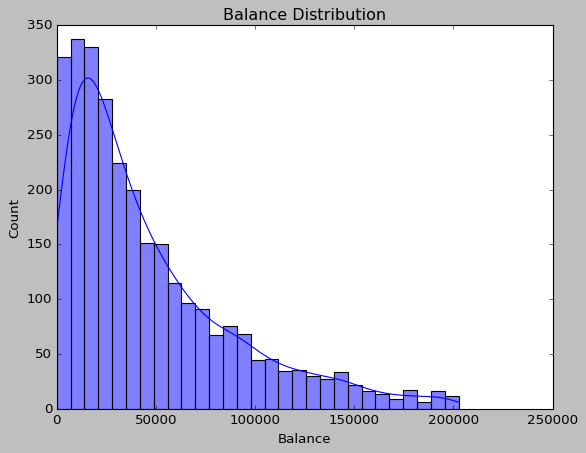

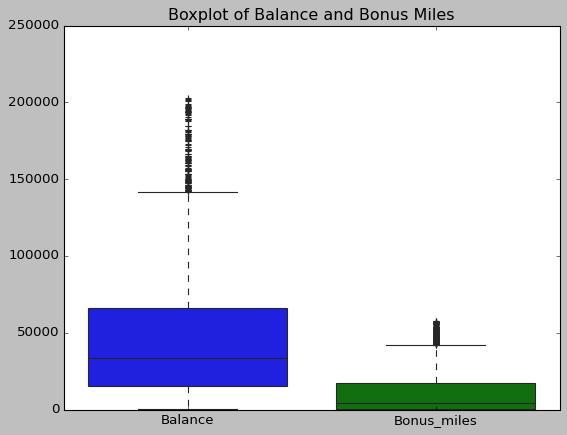

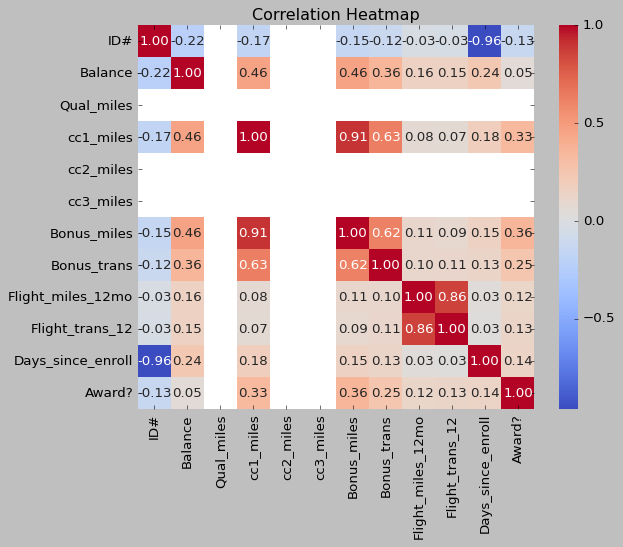

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
sns.histplot(airline['Balance'], kde=True)
plt.title("Balance Distribution")
plt.show()

sns.boxplot(data=airline[['Balance', 'Bonus_miles']])
plt.title("Boxplot of Balance and Bonus Miles")
plt.show()

# Correlation heatmap
sns.heatmap(airline.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#Implementing Clustering Algorithms

# Hierarchical Clustering

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(airline.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


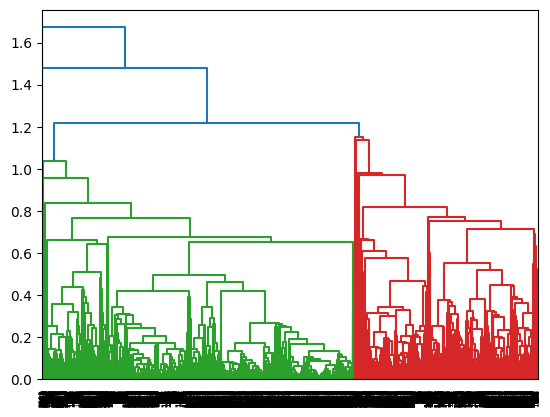

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [8]:
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='average')

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
Clusters.head()

,Clusters
0,1
1,1
2,1
3,1
4,0


In [11]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
airline['clusterid'] = hc.labels_
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [13]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data',index_col=0)
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


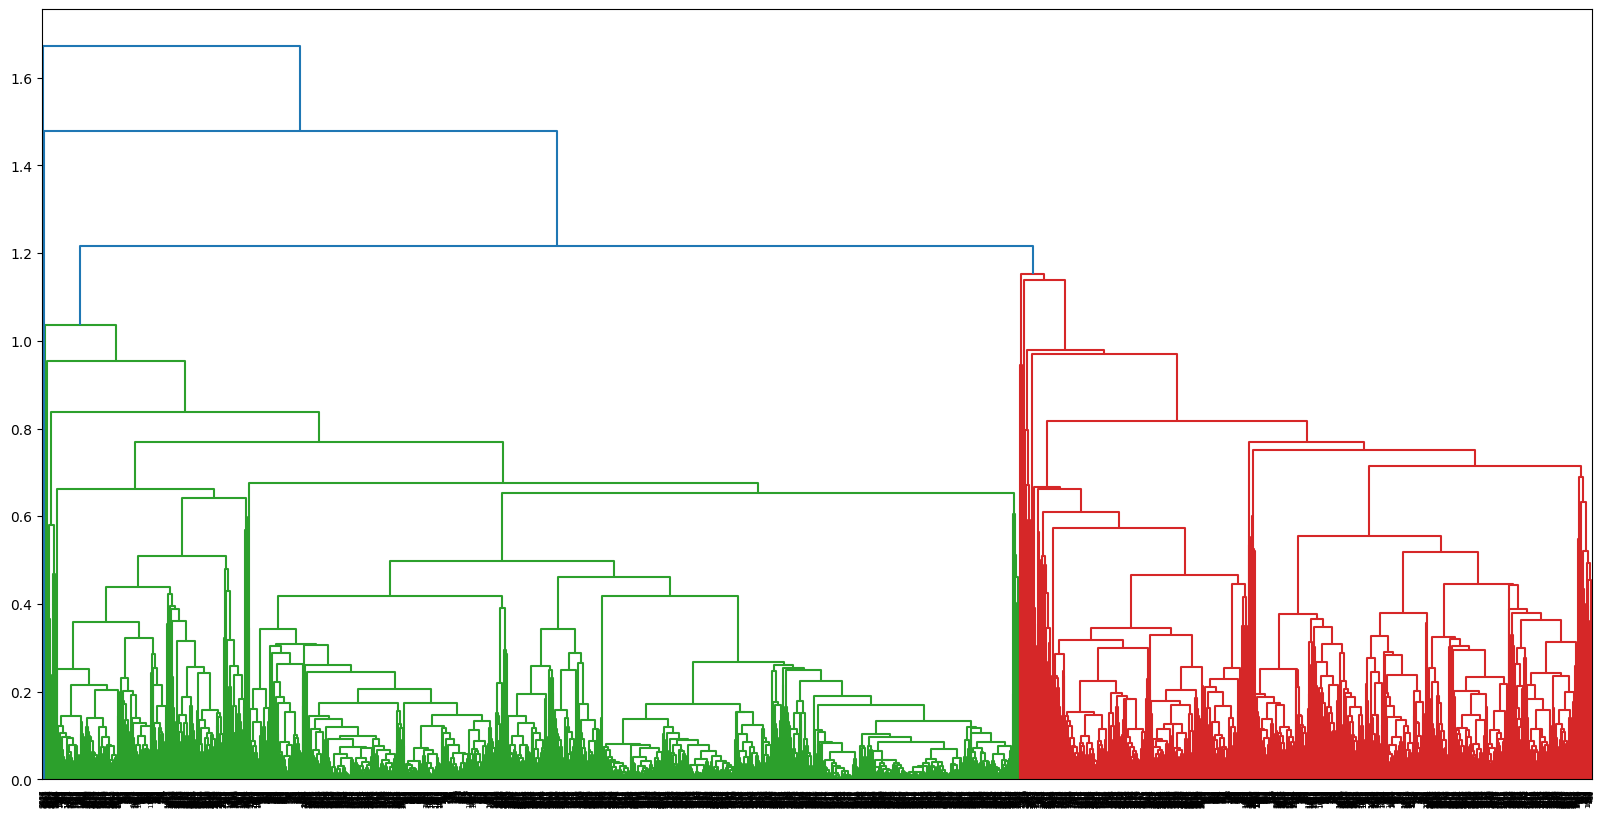

In [14]:
fig=plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(norm_func(airline), method='average'),labels=airline.index)

# K-Means Clustering

In [16]:
# we need import k-means
from sklearn.cluster import KMeans

In [20]:
airline=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
data_norm=norm_func(airline.iloc[:,1:])

In [23]:
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [24]:
model=KMeans(n_clusters=7).fit(data_norm)

In [25]:
model.inertia_

295.54492937547803

<function matplotlib.pyplot.show(close=None, block=None)>

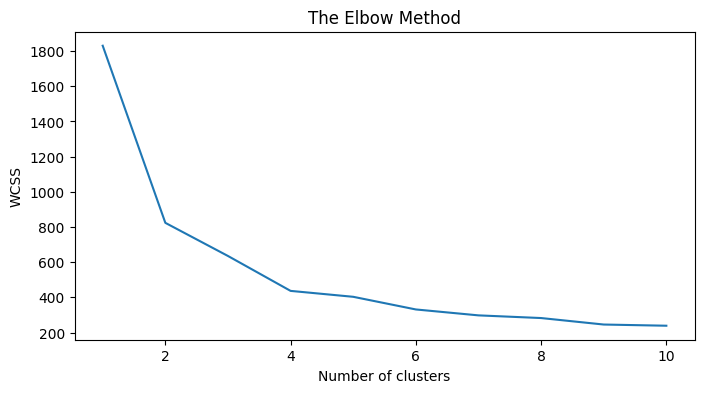

In [26]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(data_norm)
  WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show

In [27]:
clf=KMeans(n_clusters=7)
clf.fit(data_norm)

KMeans(n_clusters=7)

In [28]:
y_names=clf.predict(data_norm)

In [29]:
y_names

array([3, 3, 3, ..., 6, 1, 1], dtype=int32)

In [30]:
clf.cluster_centers_

array([[ 5.96768416e-02,  3.20741860e-02,  3.57142857e-02,
         1.68067227e-02,  4.20168067e-03,  3.43682081e-02,
         1.23379584e-01,  3.42797988e-02,  6.24702711e-02,
         7.11237377e-01,  1.00000000e+00],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -4.99600361e-16],
       [ 6.80160581e-02,  1.81407809e-02,  7.55524862e-01,
         6.90607735e-04,  7.25138122e-03,  1.83643389e-01,
         2.40170885e-01,  2.46597854e-02,  4.31564683e-02,
         6.23721701e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  2.22044605e-15],
       [ 8.09517556e-02,  4.94134309e-03,  6.77152318e-01,
        -2.42861287e-17,  6.62251656e-03,  1.29280246e-01,
  

In [31]:
clf.labels_

array([3, 3, 3, ..., 6, 1, 1], dtype=int32)

In [32]:
md=pd.Series(y_names)
data_norm['cluster']=md
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,3
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,3
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,3
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,3
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,6
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,6
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,6
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [33]:
data_norm.iloc[:,0:].groupby(data_norm.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
cluster,,,,,,,,,,,,
0,0.059677,0.032074,0.035714,0.016807,0.004202,0.034368,0.123380,0.034280,0.062470,0.711237,1.0,0.0
1,0.019414,0.008444,0.017684,0.008236,0.001696,0.012305,0.071784,0.006907,0.011390,0.239981,0.0,1.0
2,0.067940,0.019051,0.755172,0.000690,0.007241,0.183455,0.240080,0.024626,0.043097,0.623410,1.0,2.0
3,0.029282,0.008065,0.030530,0.009793,0.000288,0.013149,0.080391,0.007912,0.013738,0.671079,0.0,3.0
4,0.080952,0.004941,0.677152,0.000000,0.006623,0.129280,0.199946,0.007145,0.012933,0.734057,0.0,4.0
5,0.058339,0.008166,0.616297,0.001582,0.004747,0.109219,0.200802,0.007394,0.010807,0.340108,0.0,5.0
6,0.034459,0.016660,0.137845,0.012531,0.000000,0.042793,0.134551,0.027865,0.047855,0.299808,1.0,6.0


In [34]:
plt.style.use('classic')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='cc1_miles', ylabel='Bonus_miles'>

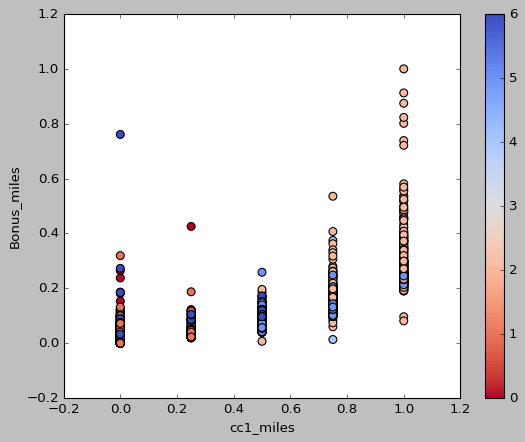

In [35]:
data_norm.plot("cc1_miles","Bonus_miles",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [36]:
WCSS

[1830.793212858416,
 823.6756984125227,
 635.2160678747765,
 436.70885761932647,
 403.0791645691201,
 331.1406958525312,
 297.4940573138219,
 282.28812445541865,
 245.40441036789414,
 238.63788254185428]

In [37]:
airline['cluster']=md
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


#DBSCAN Clustering

In [162]:
# In DBSCAN  we need to inport DBSCAN and StandrdScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [201]:
airline=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [203]:
airline.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [204]:
print(airline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [207]:
airline.drop(['Qual_miles','cc2_miles','cc3_miles'],axis=1,inplace=True)

In [208]:
airline.values

array([[    1, 28143,     1, ...,     0,  7000,     0],
       [    2, 19244,     1, ...,     0,  6968,     0],
       [    3, 41354,     1, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     3, ...,     0,  1402,     1],
       [ 4020, 54899,     1, ...,     1,  1401,     0],
       [ 4021,  3016,     1, ...,     0,  1398,     0]])

In [209]:
array=airline.values

In [210]:
array

array([[    1, 28143,     1, ...,     0,  7000,     0],
       [    2, 19244,     1, ...,     0,  6968,     0],
       [    3, 41354,     1, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     3, ...,     0,  1402,     1],
       [ 4020, 54899,     1, ...,     1,  1401,     0],
       [ 4021,  3016,     1, ...,     0,  1398,     0]])

In [211]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [212]:
X

array([[-1.73512503e+00, -4.51140783e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [213]:
dbscan = DBSCAN(eps=1.9, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1.9, min_samples=8)

In [214]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [215]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [216]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [217]:
pd.concat([airline,cl],axis=1)

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,1,174,1,0,0,7000,0,0
1,2,19244,1,215,2,0,0,6968,0,0
2,3,41354,1,4123,4,0,0,7034,0,0
3,4,14776,1,500,1,0,0,6952,0,0
4,5,97752,4,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,1,8525,4,200,1,1403,1,1
3995,4018,64385,1,981,5,0,0,1395,1,1
3996,4019,73597,3,25447,8,0,0,1402,1,1
3997,4020,54899,1,500,1,500,1,1401,0,0


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

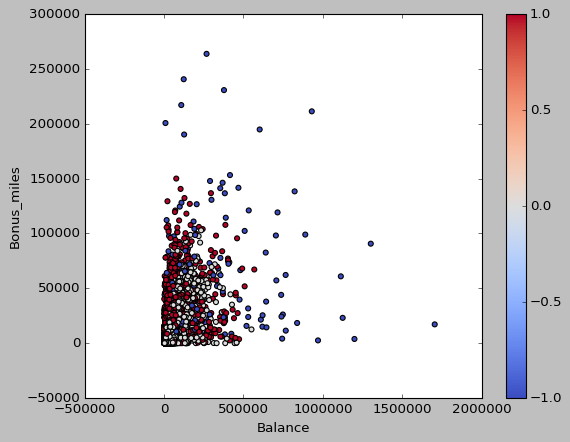

In [218]:
airline.plot(x="Balance",y="Bonus_miles",c=dbscan.labels_,kind="scatter",cmap="coolwarm")

In [219]:
from sklearn.metrics import silhouette_score
silhouette_score(X,dbscan.labels_)

np.float64(0.24248629567050906)

In [220]:
from sklearn.neighbors import NearestNeighbors

In [221]:
neigh= NearestNeighbors(n_neighbors=3)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

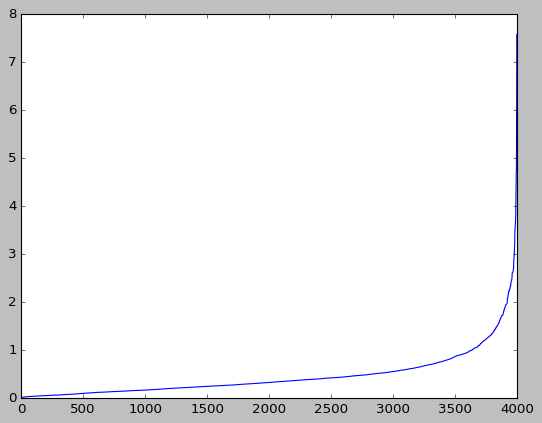

In [222]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)